In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("GSAF5.csv",encoding='iso-8859-1')

In [3]:
#Las columnas de Unnamed: 22 y Unnamed: 23 están practicamente vacias.

data = data.drop(['Unnamed: 22','Unnamed: 23'],axis=1)

# Más de la mitad de valores en la columna Time y casi la mitad de los valores de la columna Species están vacios
# por lo que no son datos fiables para sacar conclusiones. Lo mismo ocurre con la columna Age.

data = data.drop(['Time','Species ','Age'],axis=1)

# Las columnas Case Number,Case Number.1, Case Number.2 no son iguales al 100% pero si en gran medida,
# Las 3 no aportan información relevante

data = data.drop(['Case Number','Case Number.1','Case Number.2'],axis=1)

# La columna original order no aporta más que otro índice, por lo que no es de utilidad.

data = data.drop(['original order'],axis=1)

# Las columnas href y href formula son iguales y no aportan información relevante.

data = data.drop(['href', 'href formula'],axis=1)

# La columna Investigator or Source no parece aportar una información clara y/o relevante.

data = data.drop(['Investigator or Source'],axis=1)

# La columna Fatal (Y/N) no hace falta, ya que en la comlumna Injury, los ataques que han sido mortales
# estan marcados como FATAL.

data = data.drop(['Fatal (Y/N)'],axis=1)

# La columna Injury puede ser vista en cada pdf adjunto para cada ataque, por lo que no es relevante.

data = data.drop(['Injury'],axis=1)

# La columna Date y Year son similares, ya que la columna Date tiene unos datos poco coherentes, se procede a 
# eliminarla.
data = data.drop(['Date'],axis=1)

# La columna Location y la columna Area no son necesarias, ya que conocemos el pais del ataque, ademas 
# la información que aporta Location puede ser encontrada en el PDF.

data = data.drop(['Location','Area'],axis=1)

# La columna name no es relevante para la elaboración de mi hipotesis final.

data = data.drop(['Name'],axis=1)

In [4]:
# Dado que hay muchos años puestos a 0, y mi hipotesis es sólo valida a partir del 1900. Voy a eliminar las lineas
# que sean anteriores a 1900 y posteriores a 1999.

data = data.drop(data[(data['Year']<1900)].index)
data = data.drop(data[(data['Year']>1999)].index)

In [5]:
# Cambio de nombre de la columna Sex para quitarle el espacio al final del nombre.

data['Sex']=data['Sex ']
data = data.drop(['Sex '],axis=1)

In [6]:
# Cambio de nombre de la columna pdf

data['Pdf']=data['pdf']
data = data.drop(['pdf'],axis=1)

In [7]:
# Reorganización de las columnas.

data = data.reindex(columns=['Year','Country','Type','Activity','Sex','Pdf'])

In [8]:
# Limpieza de los valores de la columna Sex que no sean M,F o NaN

data = data.drop(data[(data['Sex']=='.')].index)
data = data.drop(data[(data['Sex']=='N')].index)

In [9]:
# Elimina todas las filas con algun valor en NaN.
data = data.dropna()

In [10]:
# Agrupa los valores Boat, Boating, Sea Disaster e Invalid de la columna 'Type' como Unprovoked.
data = data.replace({'Type': {'Invalid':'Unprovoked','Boat':'Unprovoked','Boating':'Unprovoked','Sea Disaster':'Unprovoked'}})

In [11]:
# Se puede deducir que la gran mayoría de ataques de tiburones durante el s.XX, no fueron provocados.
data['Type'].value_counts()

Unprovoked    2500
Provoked       311
Name: Type, dtype: int64

In [12]:
# Se puede deducir que el primer pais con mas ataques son los Estados Unidos y el segundo Australia, seguido por 
# Suráfrica, y el resto de la lista registran muchos menos ataques en comparación con los 3 primeros.
data['Country'].value_counts()

USA                     938
AUSTRALIA               628
SOUTH AFRICA            340
PAPUA NEW GUINEA         92
ITALY                    44
                       ... 
NETHERLANDS ANTILLES      1
BRITISH ISLES             1
NICARAGUA                 1
EGYPT / ISRAEL            1
TRINIDAD & TOBAGO         1
Name: Country, Length: 139, dtype: int64

In [13]:
# Ataques de media por año durante el s.XX
x = 365*100 + 25
Total = x/2811
print('La media de ataques al año durante el s.XX es: {}'.format(round(Total)))

La media de ataques al año durante el s.XX es: 13


In [14]:
data = data.sort_values(by=['Year','Country','Type','Sex'], ascending=[True,True,True,True])

In [15]:
# Reinicia el ìndice para el nuevo dataframe.
data = data.reset_index(drop=True)

In [16]:
data.head()

,Year,Country,Type,Activity,Sex,Pdf
0,1900,AUSTRALIA,Unprovoked,Bathing,M,1900.12.27-Houston.pdf
1,1900,AUSTRALIA,Unprovoked,Swimming,M,1900.09.15-Hennessy.pdf
2,1900,AUSTRALIA,Unprovoked,"Standing, gathering oysters",M,1900.01.28-Duck.pdf
3,1900,CROATIA,Unprovoked,Swimming,M,1900.07.31-Croatia.pdf
4,1900,SOUTH AFRICA,Unprovoked,Swimming,M,1900.11.14-Strathorn.pdf


In [17]:
data2=data

In [18]:
data2['Year'] = data2['Year'].T

In [19]:
lst = data2['Year'].value_counts()
lst = lst.head(20)

In [45]:
data2['Country'].value_counts().head(10)

USA                 938
AUSTRALIA           628
SOUTH AFRICA        340
PAPUA NEW GUINEA     92
ITALY                44
NEW ZEALAND          44
MEXICO               43
BAHAMAS              42
BRAZIL               40
PHILIPPINES          31
Name: Country, dtype: int64

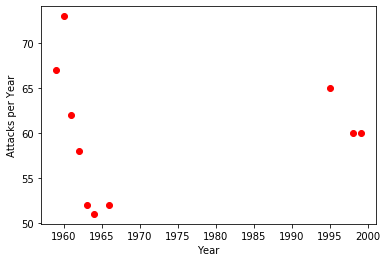

In [71]:
plt.plot(data2['Year'].value_counts().head(10),'ro', markersize=6)
plt.xlabel('Year')
plt.ylabel('Attacks per Year')
plt.show()

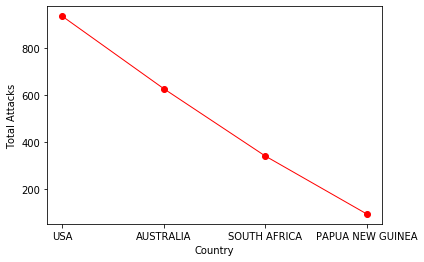

In [77]:
plt.plot(data2['Country'].value_counts().head(4),'ro-',linewidth=1)
plt.xlabel('Country')
plt.ylabel('Total Attacks')
plt.show()